In [1]:
#Data analysis
import pandas as pd
import numpy as np

#Graphing
import matplotlib.pyplot as plt


#Standardizing
from sklearn import preprocessing


from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import classification_report

from xgboost import XGBClassifier


c:\Python38\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
#Reading data
root = "respiratory_sound_database/"
all_data = pd.read_csv(root + "dataframes/sound_diagnosis.csv")
classes = pd.read_pickle(root + "dataframes/class-codes-for-per-patient-mfcc.pkl")
patient_diagnosis = pd.read_csv(root+"patient_diagnosis.csv", names=["patient", "diagnosis"])

In [3]:
all_data_final = all_data.drop(["patient"], axis = 1)

In [4]:
all_data_final

,diagnosis,zero_crossing_rate,spectral_centroid_mean,spectral_centroid_median,spectral_centroid_std,root_mean_square_mean,root_mean_square_median,root_mean_square_std,spectral_rolloff_85_mean,spectral_rolloff_85_median,...,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16
0,0,0.002703,145.907974,132.897698,80.499597,0.045906,0.043956,0.015496,129.930178,102.282715,...,33.882719,26.100874,9.883459,19.923167,21.763529,15.538423,6.648538,13.444543,15.291958,10.434458
1,1,0.003019,194.959576,183.694647,74.179136,0.022426,0.021317,0.008030,194.469591,161.499023,...,-22.417553,28.517933,-7.581968,14.792792,44.441593,3.901180,20.310940,-1.075218,3.679981,-2.306754
2,2,0.007287,149.068986,123.309020,93.979109,0.058883,0.045448,0.046155,289.526145,218.920898,...,-5.433207,17.079572,-4.765042,31.368672,15.671483,9.827294,22.432210,2.534823,23.480220,14.030258
3,0,0.069128,1072.966123,1134.265069,214.532435,0.028946,0.027611,0.012954,1711.769255,1744.189453,...,-9.396896,23.365917,25.854355,31.040987,5.761407,18.151335,1.027621,10.816775,2.934234,17.734602
4,2,0.007709,395.837608,370.268637,180.749856,0.098769,0.088583,0.044479,596.849825,336.456299,...,42.113716,34.795153,14.746895,25.910447,20.821955,19.720680,4.071386,15.422226,13.257470,10.313030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,2,0.001962,87.973154,74.352573,60.144119,0.262626,0.218038,0.150184,107.288526,71.777344,...,24.703486,16.106707,21.100173,31.723652,13.592641,11.612599,10.559210,4.717309,11.968887,14.505526
119,2,0.001429,120.142143,104.791262,71.810668,0.261914,0.235259,0.122984,91.240276,57.421875,...,32.523426,41.160992,12.237688,5.164334,21.111019,23.719230,8.630318,7.783504,12.677872,11.371715
120,1,0.002389,221.320155,193.802162,130.773998,0.061126,0.058770,0.027410,118.914190,80.749512,...,34.526129,21.052407,10.101821,16.178956,21.252956,12.626164,6.689349,11.018046,15.452478,8.372151
121,1,0.003059,162.208720,130.190785,105.784403,0.049908,0.047129,0.019001,178.852859,86.132812,...,33.569832,12.644453,9.453696,8.094234,21.282808,6.673789,6.579703,6.620239,15.480480,5.829107


In [5]:
class_list = list(classes[0]) #For convenience
print(class_list)
classes

['Bronchiectasis', 'Bronchiolitis', 'COPD', 'Healthy', 'Pneumonia', 'URTI']


,0
0,Bronchiectasis
1,Bronchiolitis
2,COPD
3,Healthy
4,Pneumonia
5,URTI


<BarContainer object of 6 artists>

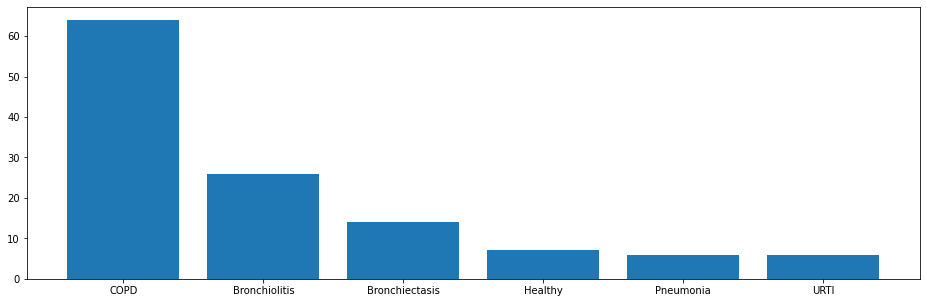

In [6]:
indexes = list(all_data_final.diagnosis.value_counts().index)
value_counts = list(all_data_final.diagnosis.value_counts())
x_vals = [classes.loc[i][0] for i in indexes]
plt.figure(figsize=(16,5))
plt.bar(x_vals, value_counts)

In [7]:

all_data_final.diagnosis.value_counts()

2    64
1    26
0    14
3     7
4     6
5     6
Name: diagnosis, dtype: int64

In [8]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

In [9]:
X=all_data_final.drop('diagnosis', axis=1)
Y=all_data_final[['diagnosis']]

In [10]:
X, Y = oversample.fit_resample(X, Y)

In [11]:
Y.diagnosis.value_counts()

0    64
1    64
2    64
3    64
4    64
5    64
Name: diagnosis, dtype: int64

In [96]:
# X_ = preprocessing.scale(X)

In [12]:
X

,zero_crossing_rate,spectral_centroid_mean,spectral_centroid_median,spectral_centroid_std,root_mean_square_mean,root_mean_square_median,root_mean_square_std,spectral_rolloff_85_mean,spectral_rolloff_85_median,spectral_rolloff_85_std,...,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16
0,0.002703,145.907974,132.897698,80.499597,0.045906,0.043956,0.015496,129.930178,102.282715,180.146783,...,33.882719,26.100874,9.883459,19.923167,21.763529,15.538423,6.648538,13.444543,15.291958,10.434458
1,0.003019,194.959576,183.694647,74.179136,0.022426,0.021317,0.008030,194.469591,161.499023,153.832350,...,-22.417553,28.517933,-7.581968,14.792792,44.441593,3.901180,20.310940,-1.075218,3.679981,-2.306754
2,0.007287,149.068986,123.309020,93.979109,0.058883,0.045448,0.046155,289.526145,218.920898,225.755454,...,-5.433207,17.079572,-4.765042,31.368672,15.671483,9.827294,22.432210,2.534823,23.480220,14.030258
3,0.069128,1072.966123,1134.265069,214.532435,0.028946,0.027611,0.012954,1711.769255,1744.189453,547.085247,...,-9.396896,23.365917,25.854355,31.040987,5.761407,18.151335,1.027621,10.816775,2.934234,17.734602
4,0.007709,395.837608,370.268637,180.749856,0.098769,0.088583,0.044479,596.849825,336.456299,528.253074,...,42.113716,34.795153,14.746895,25.910447,20.821955,19.720680,4.071386,15.422226,13.257470,10.313030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,0.003270,140.607258,127.329629,74.629634,0.072389,0.065859,0.030002,167.504049,129.543219,148.859994,...,34.253859,29.772384,10.028827,29.897448,16.817069,17.678605,4.401769,7.504071,10.468951,11.079022
380,0.003130,130.538103,107.350886,80.298014,0.096349,0.091559,0.042531,151.829547,99.644896,184.687566,...,33.544674,31.600308,9.336978,36.110772,21.211340,33.474476,6.435948,21.153825,15.397492,13.989207
381,0.004950,225.945206,207.729955,104.565663,0.073798,0.063640,0.036563,209.478697,154.398269,245.501693,...,36.489666,23.556421,13.472482,18.714744,23.533917,13.123702,6.737636,10.230988,14.715399,7.745719
382,0.003158,145.015623,130.251183,78.595901,0.083197,0.077303,0.034179,170.004796,114.063692,180.684223,...,34.452117,26.347561,9.835538,22.685817,19.768728,16.597597,5.622692,12.588200,13.949276,12.290591


In [13]:
Y

,diagnosis
0,0
1,1
2,2
3,0
4,2
...,...
379,5
380,5
381,5
382,5


In [14]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y, test_size=0.2,stratify=Y)

In [15]:
Xtrain

,zero_crossing_rate,spectral_centroid_mean,spectral_centroid_median,spectral_centroid_std,root_mean_square_mean,root_mean_square_median,root_mean_square_std,spectral_rolloff_85_mean,spectral_rolloff_85_median,spectral_rolloff_85_std,...,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16
146,0.004627,391.436807,354.175877,174.259016,0.048892,0.045705,0.023429,333.540342,190.637953,392.925693,...,38.606067,26.861232,11.786857,19.622985,22.691570,11.370443,5.043264,6.046433,14.730644,6.283899
275,0.002631,158.127982,144.451582,92.119178,0.078324,0.071451,0.035934,149.746283,110.894914,198.729586,...,33.648620,29.099996,9.943580,20.647408,21.643212,15.210589,6.992588,12.382610,15.168327,9.879834
335,0.004788,211.189418,185.285885,112.863904,0.041396,0.039424,0.015937,251.746962,167.289058,264.065503,...,27.003685,25.788391,1.708160,19.342240,13.026833,13.474904,-0.159026,9.283270,10.306275,6.007767
169,0.016044,499.310769,497.042734,151.570092,0.023517,0.021554,0.010332,547.950505,468.104307,331.262604,...,28.821272,23.880212,20.999069,21.137758,24.106139,15.740869,8.011061,12.182485,14.085810,11.372503
251,0.010370,382.512447,374.005554,106.838026,0.018037,0.015009,0.009906,490.802678,418.767308,279.415982,...,26.631740,21.659608,20.057879,30.935692,30.462045,31.802807,11.708773,12.140286,14.473584,7.918013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0.043826,901.872249,924.403027,216.276288,0.006611,0.006076,0.003112,1703.517139,1794.441335,434.747876,...,12.259892,0.178873,26.006718,22.424643,17.456180,5.696541,-9.859564,-10.793342,2.466209,3.740647
246,0.006366,284.835263,236.197648,141.430622,0.031213,0.028529,0.017786,256.441280,193.798828,190.714442,...,43.147830,38.191431,21.367061,39.119077,31.444657,32.806282,14.434319,14.714117,20.319358,14.566589
36,0.002431,173.890344,157.581095,103.541049,0.123800,0.115166,0.051474,197.887901,113.049316,262.471363,...,32.964290,21.979186,9.340302,17.494596,20.959296,13.937623,6.399336,11.854007,14.989723,9.183018
243,0.008346,319.627223,309.979078,111.033152,0.030968,0.025172,0.017422,381.721650,312.602783,251.256268,...,31.653056,31.269922,16.792095,33.764849,27.805061,29.907232,10.655884,11.583802,16.076691,5.732402


In [16]:
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=91, min_child_weight=3, max_depth=4, gamma=0.1, reg_alpha=0.01)

In [17]:
xgb_model.fit(Xtrain,Ytrain.values.ravel())

c:\Python38\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Python38\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:43:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0.1, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=4, min_child_weight=3, missing=nan,
              monotone_constraints='()', n_estimators=91, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0.01, reg_lambda=1,
              scale_pos_weight=None, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [18]:
rf_model = RandomForestClassifier(n_estimators=300, max_samples=0.3, max_features=0.9)

In [19]:
rf_model.fit(Xtrain,Ytrain.values.ravel())

RandomForestClassifier(max_features=0.9, max_samples=0.3, n_estimators=300)

In [20]:
preds_rf = rf_model.predict(Xtrain)

In [21]:
# Accuracy = train Random Forest
np.mean(Ytrain.diagnosis == preds_rf) #training accuracy of 95%

0.9641693811074918

In [22]:
preds1_rf = rf_model.predict(Xtest)

In [23]:
# Accuracy = test Random Forest
np.mean(Ytest.diagnosis == preds1_rf) #test accuracy of 84%

0.8961038961038961

In [24]:
print(classification_report(Ytest, preds1_rf))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        12
           1       1.00      0.85      0.92        13
           2       1.00      0.69      0.82        13
           3       0.87      1.00      0.93        13
           4       0.87      1.00      0.93        13
           5       0.87      1.00      0.93        13

    accuracy                           0.90        77
   macro avg       0.91      0.90      0.89        77
weighted avg       0.91      0.90      0.89        77



In [25]:
preds_xg = xgb_model.predict(Xtrain)


c:\Python38\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [26]:
# Accuracy = train XGBoost
np.mean(Ytrain.diagnosis == preds_xg) #training accuracy of 100%

1.0

In [27]:
preds1_xg = xgb_model.predict(Xtest)

In [28]:
# Accuracy = test XGBoost
np.mean(Ytest.diagnosis == preds1_xg) #test accuracy of 89.6%

0.922077922077922

In [29]:
print(classification_report(Ytest, preds1_xg))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85        12
           1       1.00      0.85      0.92        13
           2       0.91      0.77      0.83        13
           3       0.93      1.00      0.96        13
           4       1.00      1.00      1.00        13
           5       0.93      1.00      0.96        13

    accuracy                           0.92        77
   macro avg       0.93      0.92      0.92        77
weighted avg       0.93      0.92      0.92        77



In [141]:
xgb_model.save_model("model.json")